# Performing Customer Analytics

In our previous lessons, we've already discussed the fundamentals on getting started with Customer Analytics. We will now look into how we can actually analyze and find insights from customer data through a coding exercise in Python.

Let us start by **installing the libraries** for performing Customer Analytics in Python.

In [ ]:
# !pip install numpy pandas matplotlib

Let us now import these libraries.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

## 1. Getting the data

For the purpose of this tutorial, we will be using the [Online Retail dataset](https://www.kaggle.com/vijayuv/onlineretail) which contains data for several transactions of the store.
The dataset contains several columns such as,
- **InvoiceNo**: Unique number assigned for each invoice 
- **StockCode**: Unique number assigned to each stock of items
- **Description**: Description of the item
- **Quantity**: Quantity of items bought
- **InvoiceDate**: Date of transaction
- **UnitPrice**: Unit price of each item
- **CustomerID**: Unique ID assigned to each customer
- **Country**: Name of the country where the order was placed

We will start by reading the csv data using `read_csv()` function of Pandas library in Python.

In [3]:
# Read the csv data as Pandas dataframe
df = pd.read_csv('data/OnlineRetail.csv')

# Display the first five rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. Data Engineering

After reading the data, we perform data engineering so as to prepare and transform our data for analysis.

### Removing irrelevant feature columns

We will not be using all the columns for the purpose of our analysis. So we are selecting only the required columns as a new dataframe `customer_df`.

In [4]:
customer_df = df[['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']]

In [5]:
# Displaying the first five rows of the dataframe
customer_df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Feature Engineering

The total amount of each transaction can be deduced by multiplying quantity and unit price of each transaction.

`Total amount = Quantity x Unit price`

In [6]:
# Assigning a new column with the value of total amount
customer_df['Total_amount'] = customer_df['Quantity'] * customer_df['UnitPrice']

<ipython-input-6-7997d753d46b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['Total_amount'] = customer_df['Quantity'] * customer_df['UnitPrice']


In [7]:
# Rearranging the columns
customer_df = customer_df[['CustomerID', 'InvoiceNo', 'Quantity', 'UnitPrice', 'Total_amount', 'InvoiceDate','Country']]

In [8]:
customer_df.head()

,CustomerID,InvoiceNo,Quantity,UnitPrice,Total_amount,InvoiceDate,Country
0,17850.0,536365,6,2.55,15.30,12/1/2010 8:26,United Kingdom
1,17850.0,536365,6,3.39,20.34,12/1/2010 8:26,United Kingdom
2,17850.0,536365,8,2.75,22.00,12/1/2010 8:26,United Kingdom
3,17850.0,536365,6,3.39,20.34,12/1/2010 8:26,United Kingdom
4,17850.0,536365,6,3.39,20.34,12/1/2010 8:26,United Kingdom


### Checking for null values

Having null values in data results in a poor representation of the data and hence they should be checked prior to working with anything related to data.

In [9]:
customer_df.isnull().sum()

CustomerID      135080
InvoiceNo            0
Quantity             0
UnitPrice            0
Total_amount         0
InvoiceDate          0
Country              0
dtype: int64

We can see that there are a lot of null values of customer ids in our dataset.

### Removing null values

We will be removing the rows with null customer ID as filling them with any value would cause the loss of individuality from the data as we do not know if all the missing values contain to the same or different customers. We are using the `dropna()` function of Pandas dataframe for removing the rows with null values from the dataframe.

In [10]:
# Dropping the null values
customer_df.dropna(inplace=True)

In [11]:
# Check for null values
customer_df.isnull().sum()

CustomerID      0
InvoiceNo       0
Quantity        0
UnitPrice       0
Total_amount    0
InvoiceDate     0
Country         0
dtype: int64

Hence, we've successfully handled the missing values.

In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CustomerID    406829 non-null  float64
 1   InvoiceNo     406829 non-null  object 
 2   Quantity      406829 non-null  int64  
 3   UnitPrice     406829 non-null  float64
 4   Total_amount  406829 non-null  float64
 5   InvoiceDate   406829 non-null  object 
 6   Country       406829 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 24.8+ MB


We can see that the InvoiceDate column is of type 'object'. Hence, we will be converting this value into datetime for our further operations.

### Converting into Datetime

In [13]:
# Converting InvoiceDate from object to datetime
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

## 3. Exploring the data

We will now explore the data and look into some numerical and statistical metrics. 

### Total countries

In [14]:
customer_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [15]:
customer_df['Country'].nunique()

37

The Online retail shop has transactions in a total of **37 countries**. 

### Number of customers per country

In [16]:
# Grouping the customers on the basis of Country and counting the number
df_country = customer_df.groupby(['Country'])['CustomerID'].nunique().reset_index()

In [17]:
df_country.columns = ['Country', 'no_of_customers']
df_country.head()

,Country,no_of_customers
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1


In [18]:
# Country with the maximum number of customers
df_country.loc[df_country['no_of_customers'].idxmax()]

Country            United Kingdom
no_of_customers              3950
Name: 35, dtype: object

In [19]:
# Country with the minimum number of customers
df_country.loc[df_country['no_of_customers'].idxmin()]

Country            Brazil
no_of_customers         1
Name: 4, dtype: object

### Plotting the values

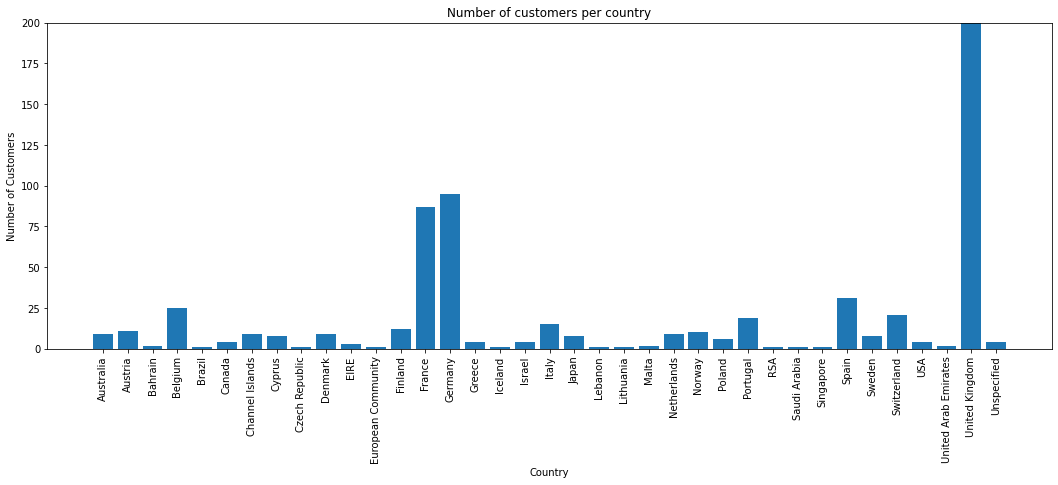

In [20]:
# We are using both scatter and line plot
plt.figure(figsize=(18, 6))

# Plotting the scatter plot between date and the revenue amount
plt.bar(df_country['Country'], df_country['no_of_customers'])

# Setting plot attributes
plt.title('Number of customers per country')
plt.xticks(rotation=90)

# minimizing the y axis limit
plt.ylim(0, 200)
plt.xlabel("Country")
plt.ylabel("Number of Customers");

### Total revenue per month

The total revenue per month is the sum of the total amount of transaction in a month. We will first deduce a new column called `"InvoiceYearMonth"` with the Year and Month of each transaction and then group the sum of total amount as the revenue of the month.

In [21]:
# Creating a new column YearMonth including only the year and month
customer_df['InvoiceYearMonth'] = customer_df['InvoiceDate'].map(lambda date: str(date.year) + "-" + str(date.month))

In [22]:
# Calculate total revenue amount for each row
# save as a new dataframe
df_revenue = customer_df.groupby(['InvoiceYearMonth'])['Total_amount'].sum().reset_index()
df_revenue

,InvoiceYearMonth,Total_amount
0,2010-12,554604.020
1,2011-1,475074.380
2,2011-10,974603.590
3,2011-11,1132407.740
4,2011-12,342506.380
5,2011-2,436546.150
6,2011-3,579964.610
7,2011-4,426047.851
8,2011-5,648251.080
9,2011-6,608013.160


### Plotting the values to see the trend

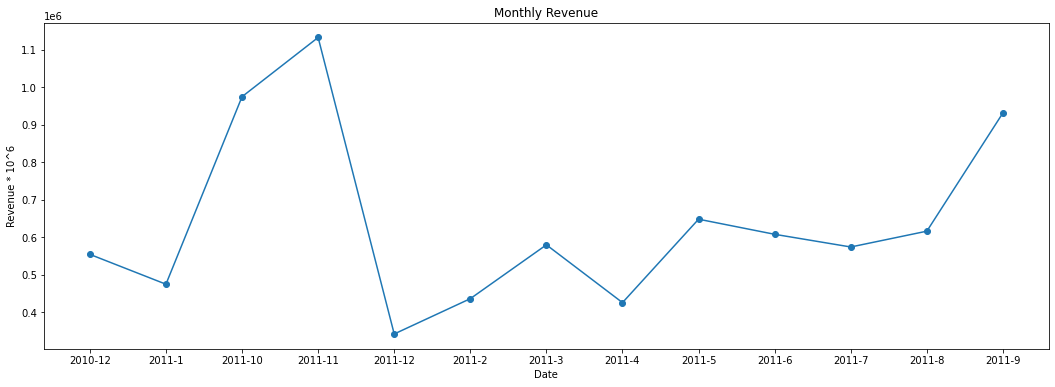

In [23]:
# We are using both scatter and line plot
plt.figure(figsize=(18, 6))

# Plotting the scatter plot between date and the revenue amount
plt.scatter(x = df_revenue['InvoiceYearMonth'], y = df_revenue['Total_amount'])
plt.plot(df_revenue['InvoiceYearMonth'], df_revenue['Total_amount'])

# Setting plot attributes
plt.title('Monthly Revenue')
plt.xlabel("Date")
plt.ylabel("Revenue * 10^6");

This plot shows that the monthly revenue generated from customers was the highest in the November of 2011 but decreased rapidly in the next month. This insight is generated by what we call **Descriptive Analytics**.

In order to find the reason behind this growth and fall in the revenue, **Diagnostic Analytics** is used.

In addition to it, the trend that we see can be used to predict the value of expected revenue in the future months using **Predictive Analytics**.

Finally, **Prescriptive Analysis** can help determine new strategies or techniques to increase sales numbers and potentially reduce such drops in the future.

### Total customers

The total number of customers can be deduced as the number of unique customer ids in our dataset.

In [24]:
customer_df['CustomerID'].nunique()

4372

The Online retail shop has a total of **4372 customers** who have purchased from the store in the duration of the recorded data.

### Monthly active customers

The monthly active customers is the sum total of the number of unique customer ids that purchased in a specific month.

In [25]:
# Creating monthly active customers dataframe by counting unique Customer IDs
monthly_active = customer_df.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [26]:
# Change column name
monthly_active.columns = ['InvoiceYearMonth', 'no_of_customers']
# Print the dataframe
monthly_active

,InvoiceYearMonth,no_of_customers
0,2010-12,948
1,2011-1,783
2,2011-10,1425
3,2011-11,1711
4,2011-12,686
5,2011-2,798
6,2011-3,1020
7,2011-4,899
8,2011-5,1079
9,2011-6,1051


### Plotting the values

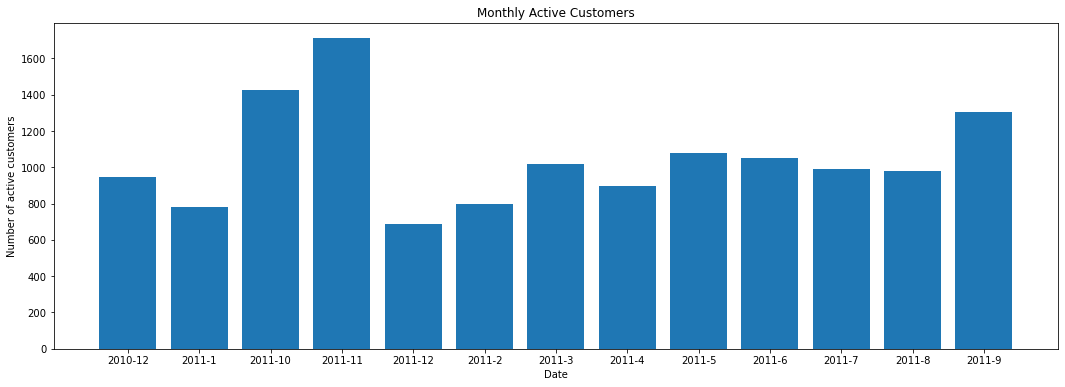

In [27]:
# We use bar plot
plt.figure(figsize=(18, 6))
plt.bar(monthly_active['InvoiceYearMonth'], monthly_active['no_of_customers'])

# Setting plot attributes
plt.title('Monthly Active Customers');
plt.xlabel("Date")
plt.ylabel("Number of active customers");

Similar to the revenue, using **Descriptive Analytics**, we can see that the number of active customers were highest in the November of 2011. However, the reason for the sudden drop in the number of active customers can be determined using **Diagnostic Analytics**.

Again, the activity for future months can be predicted based on the pattern shown using **Predictive Analytics** and **Prescriptive Analysis** can help determine new strategies or techniques to increase the number of active customers.

### Recency of purchase per customer

We will now create a new feature column that determines the recency of purchase. For this, we are taking the last date in the dataset as the observation point and calculating the number of days since the last purchase.

If the latest date in dataset is 2012-12-27 and the last date of purchase of a customer 2012-12-01, then the number of days since the last purchase can be calculated as (2012-12-27) - (2012-12-01) = 26 days.

In [28]:
# We will first create a new dataframe with unique customer IDs
df_user = pd.DataFrame(customer_df['CustomerID'].unique())
df_user.columns = ['CustomerID']

In [29]:
# Get the max purchase date for each customer and create a dataframe with it
df_max_purchase = customer_df.groupby('CustomerID').InvoiceDate.max().reset_index()
df_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [30]:
# We take our observation point as the max invoice date in our dataset
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days 

In [31]:
# Finally merge this dataframe to our user dataframe
df_user = pd.merge(df_user, df_max_purchase[['CustomerID','Recency']], on='CustomerID')

# Display the dataframe
df_user.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,329


### Plotting the values as histogram

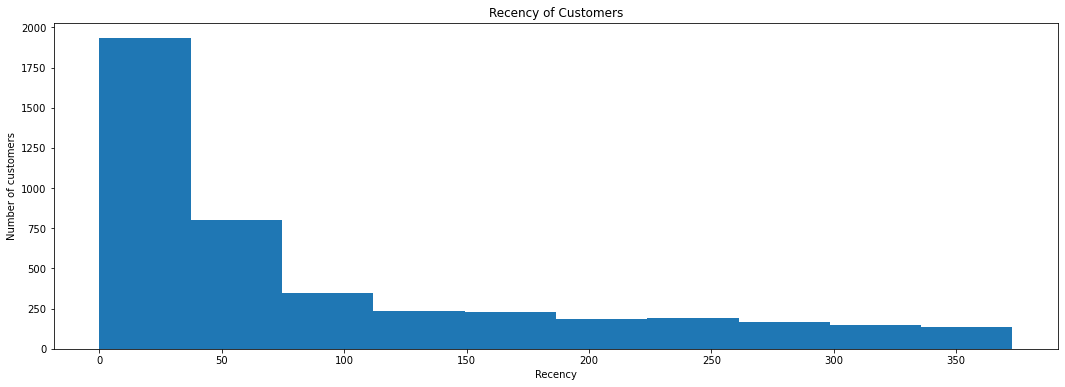

In [32]:
# Plot a recency histogram
plt.figure(figsize=(18, 6))
plt.hist(df_user['Recency']);

# Setting plot attributes
plt.title('Recency of Customers');
plt.xlabel("Recency")
plt.ylabel("Number of customers");

It can be seen that most customers have a recency, i.e., number of days since last purchase in the range 0-50, which means that the majority of customers are active.

### Frequency of purchase per customer

The frequency of purchase is determined by the total number of orders of each customer. 

In [33]:
# Get transaction date counts for each user and create a dataframe with it
df_frequency = customer_df.groupby('CustomerID').InvoiceDate.count().reset_index()
df_frequency.columns = ['CustomerID','Frequency']

# Merge this data to our main dataframe
df_user = pd.merge(df_user, df_frequency, on='CustomerID')

In [34]:
df_user

,CustomerID,Recency,Frequency
0,17850.0,301,312
1,13047.0,31,196
2,12583.0,2,251
3,13748.0,95,28
4,15100.0,329,6
...,...,...,...
4367,13436.0,1,12
4368,15520.0,1,18
4369,13298.0,0,2
4370,14569.0,0,12


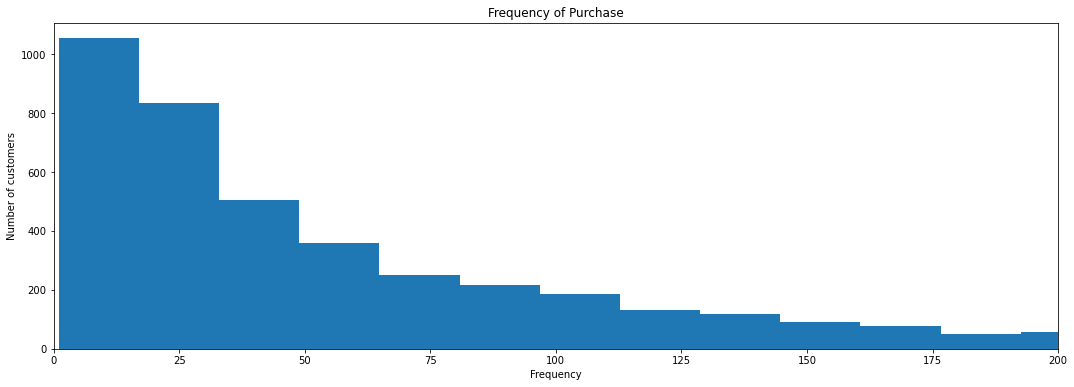

In [35]:
# Plot a frequency histogram
plt.figure(figsize=(18, 6))
plt.hist(df_user['Frequency'], bins=500);

# Setting plot attributes
plt.title('Frequency of Purchase');
plt.xlim(0, 200)
plt.xlabel("Frequency")
plt.ylabel("Number of customers");

### Monetary Value (Revenue) per customer

The revenue per customer is the sum total of transactional amount of all the purchases made by each customer.

In [36]:
# Getting accumulative revenue amount for each customer
df_revenue = customer_df.groupby('CustomerID')['Total_amount'].sum().reset_index()

In [37]:
# Merge this data to our main dataframe
df_user = pd.merge(df_user, df_revenue, on='CustomerID')
df_user

,CustomerID,Recency,Frequency,Total_amount
0,17850.0,301,312,5288.63
1,13047.0,31,196,3079.10
2,12583.0,2,251,7187.34
3,13748.0,95,28,948.25
4,15100.0,329,6,635.10
...,...,...,...,...
4367,13436.0,1,12,196.89
4368,15520.0,1,18,343.50
4369,13298.0,0,2,360.00
4370,14569.0,0,12,227.39


The customers generating the maximum and minimum revenue can be simply identified using the functions such as `idxmax()`, `idxmin()`. 

In [38]:
# Maximum transaction amount in the data
df_user.loc[df_user['Total_amount'].idxmax()]

CustomerID       14646.00
Recency              1.00
Frequency         2085.00
Total_amount    279489.02
Name: 908, dtype: float64

In [39]:
# Minimum transaction amount in the data
df_user.loc[df_user['Total_amount'].idxmin()]

CustomerID      17448.00
Recency           144.00
Frequency           1.00
Total_amount    -4287.63
Name: 3099, dtype: float64

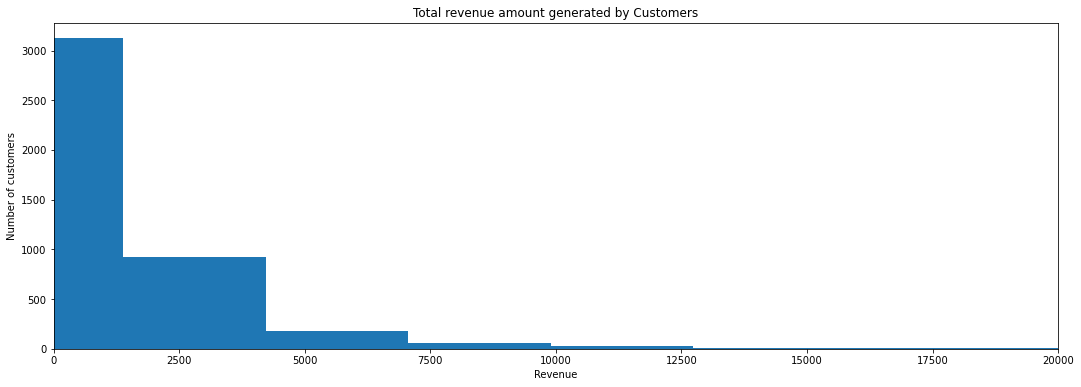

In [40]:
# Plot a revenue histogram
plt.figure(figsize=(18, 6))
plt.hist(df_user['Total_amount'], bins=100);

# Setting plot attributes
plt.xlim(0, 20000)
plt.title('Total revenue amount generated by Customers');
plt.xlabel("Revenue")
plt.ylabel("Number of customers");

Based on these histogram plots on Recency, frequency and monetary value, we can clearly see that the highest number of customers frequently have total number of orders in the range 0-20 and most customers generate revenue amount in the range 0-2000 dollars. **Prescriptive Analysis** can help determine new strategies or techniques to overcome this and increase sales numbers.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Customer Profiling and Segmentation

In this coding exercise, we will be profling and segmenting customers based on **RFM Analysis**, i.e.,
- Recency: How recently they purchased from the platform
- Frequency: How often they purchase from the platform
- Monetary Value: How much revenue are they generating to the platform

Let us start by installing scikilt-learn library.

In [41]:
# !pip install scikit-learn

We will be implementing the **KMeans Clustering algorithm** in Machine Learning to segment our customers into different groups (classes). We will be using the `df_user` data that we generated in our previous coding lesson.

Let us import the KMeans class from the scikit-learn library.

In [42]:
from sklearn.cluster import KMeans

Let us now define the class object as `kmeans` with number of clusters as 4.

In [43]:
# Build 4 clusters 
kmeans = KMeans(n_clusters=4)

## Segmenting Customers based on Recency

We will now fit the model object into the recency values in our dataframe.

In [44]:
kmeans.fit(df_user[['Recency']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predicting the value of clusters and saving them as a new column `RecencyCluster` in the dataframe.

In [45]:
df_user['RecencyCluster'] = kmeans.predict(df_user[['Recency']])

In [46]:
# Ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [47]:
df_user = order_cluster('RecencyCluster', 'Recency', df_user, False)

In [48]:
df_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,506.0,308.851779,39.144563,250.0,274.0,305.0,350.75,373.0
1,627.0,189.451356,32.948533,135.0,161.0,187.0,217.00,249.0
2,1072.0,79.278918,23.875838,49.0,59.0,73.0,95.00,134.0
3,2167.0,17.538533,13.320860,0.0,6.0,16.0,28.00,48.0


## Segmenting Customers based on Frequency

We will now fit the model object into the frequency values in our dataframe.

In [49]:
kmeans.fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

In [50]:
# Order the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency',df_user,True)

# See details of each cluster
df_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,482.0,329.107884,132.670589,190.0,228.0,286.0,393.5,803.0
2,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
3,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0


## Segmenting Customers based on Revenue

We will now fit the model object into the revenue values in our dataframe.

In [51]:
kmeans.fit(df_user[['Total_amount']])
df_user['RevenueCluster'] = kmeans.predict(df_user[['Total_amount']])

In [52]:
# Order the cluster numbers
df_user = order_cluster('RevenueCluster', 'Total_amount',df_user,True)

# Show details of the dataframe
df_user.groupby('RevenueCluster')['Total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4252.0,1160.746285,1403.441736,-4287.63,286.565,623.575,1476.0700,8257.04
1,102.0,15390.295980,7557.269118,8393.22,10192.235,12395.080,17460.8075,40340.78
2,15.0,71423.516000,28632.631870,50415.49,52287.280,57385.880,77008.7300,132572.62
3,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.490,267963.7550,279489.02


In [53]:
# Calculate overall score
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']
df_user.groupby('OverallScore')['Recency','Frequency','Total_amount'].mean()

<ipython-input-53-4eed3eb266d6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_user.groupby('OverallScore')['Recency','Frequency','Total_amount'].mean()


,Recency,Frequency,Total_amount
OverallScore,,,
0,308.875000,22.273810,343.315179
1,190.017713,32.996779,538.352208
2,80.240116,46.644166,915.911149
3,20.551163,70.611628,1256.672396
4,13.252577,306.242268,4426.578608
5,7.126582,518.278481,14246.767595
6,8.636364,955.909091,44249.222727
7,2.555556,2432.555556,98056.746667
8,1.333333,4372.000000,156394.183333


In [54]:
df_user.head()

,CustomerID,Recency,Frequency,Total_amount,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore
0,17850.0,301,312,5288.63,0,1,0,1
1,15808.0,305,210,3724.77,0,1,0,1
2,13047.0,31,196,3079.10,3,1,0,4
3,12583.0,2,251,7187.34,3,1,0,4
4,14688.0,7,359,5107.38,3,1,0,4


## Segmenting Customers based on Overall Score

We will now segment the customers into three groups based on overall score.

In [55]:
# Segment the customers based on overall score
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
df_user.loc[df_user['OverallScore']>4,'Segment'] = 'High-Value' 

### Plot the segmentation 

#### Frequency vs Total amount


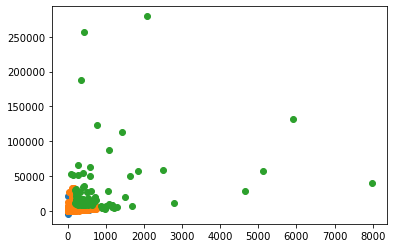

In [56]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Frequency'],
        y=df_user.query("Segment == 'Low-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Frequency'],
        y=df_user.query("Segment == 'Mid-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Frequency'],
        y=df_user.query("Segment == 'High-Value'")['Total_amount'])

#### Recency vs Total amount


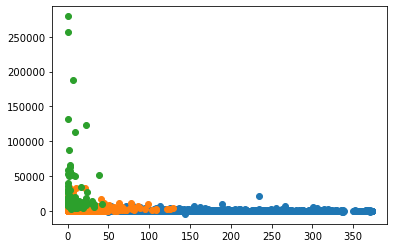

In [57]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
        y=df_user.query("Segment == 'Low-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
        y=df_user.query("Segment == 'Mid-Value'")['Total_amount'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
        y=df_user.query("Segment == 'High-Value'")['Total_amount'])

#### Recency vs Frequency


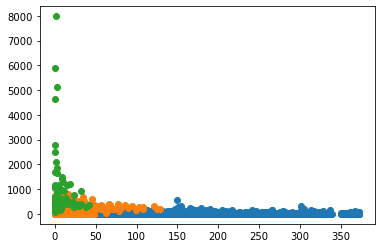

In [58]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
        y=df_user.query("Segment == 'Low-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
        y=df_user.query("Segment == 'Mid-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
        y=df_user.query("Segment == 'High-Value'")['Frequency'])

#### Total amount vs Frequency

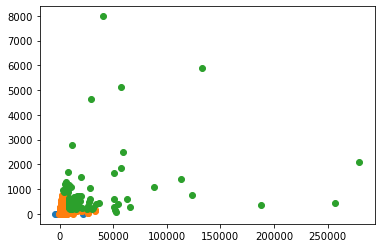

In [59]:
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Total_amount'],
        y=df_user.query("Segment == 'Low-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Total_amount'],
        y=df_user.query("Segment == 'Mid-Value'")['Frequency'])

plt.scatter(x=df_user.query("Segment == 'High-Value'")['Total_amount'],
        y=df_user.query("Segment == 'High-Value'")['Frequency'])

Hence, we've successfully segmented our customers and these segments can now help us in various processes of building the business such as sales and marketing.